# **Problem Statement**

You will use the example of housing price prediction.
We will use a simple data set with only two data points - a house with 1000 square feet(sqft) sold for 300,000 dollar and a house with 2000 square feet sold for $500,000. These two points will constitute our data or training set. In this lab, the units of size are 1000 sqft and the units of price are 1000s of dollars.


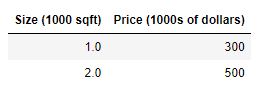

**Task:**  fit a linear regression model to  predict price for other houses - say, a house with 1200 sqft.

Import important libraries

NumPy, a popular library for scientific computing

Matplotlib, a popular library for plotting data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)
x_train=np.array([1.0,2.0])
y_train=np.array([300.0,500.0])
print(f"x_train: {x_train}")
print(f"y_train: {y_train}")

x_train: [1. 2.]
y_train: [300. 500.]


Number of training examples m

We will use  m to denote the number of training examples. Numpy arrays have a .shape parameter. x_train.shape returns a python tuple with an entry for each dimension. x_train.shape[0] is the length of the array and number of examples as shown below.

In [6]:
# m is the number of training examples
print(f" x_train.shape = {x_train.shape}")
m=x_train.shape[0]
print(f" x_train.shape[0] = {m}")

 x_train.shape = (2,)
 x_train.shape[0] = 2


One can also use the Python len() function as shown below.

In [7]:
m=len(x_train)
print(f"Number of training examples is: {m}")

Number of training examples is: 2


**Training example x_i, y_i**

You will use (x (𝑖) , y (𝑖) ) to denote the  𝑖𝑡ℎ  training example. Since Python is zero indexed, (x (0) , y (0) ) is (1.0, 300.0) and (x (1) , y (1) ) is (2.0, 500.0).

To access a value in a Numpy array, one indexes the array with the desired offset. For example the syntax to access location zero of x_train is x_train[0]. Run the next code block below to get the  𝑖𝑡ℎ  training example.

In [8]:
i=0
x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (1.0, 300.0)


In [9]:
i=1
x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(1), y^(1)) = (2.0, 500.0)


**Plotting the data**

You can plot these two points using the scatter() function in the matplotlib library, as shown in the cell below.

The function arguments marker and c show the points as red crosses (the default is blue dots).
You can use other functions in the matplotlib library to set the title and labels to display

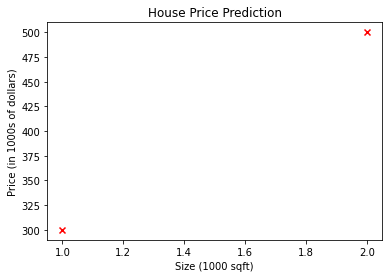

In [10]:
#plot the data set
plt.scatter(x_train, y_train, marker='x', c='r')
#  set tthe title
plt.title("House Price Prediction")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

**Model function**

The model function for linear regression (which is a function that maps from x to y) is represented as

𝑓𝑤,𝑏(𝑥(𝑖))=𝑤𝑥(𝑖)+𝑏


The formula above is how you can represent straight lines - different values of  𝑤  and  𝑏  give you different straight lines on the plot.
Let's try to get a better intuition for this through the code blocks below. Let's start with  𝑤=100  and  𝑏=100 .

Note: You can come back to this cell to adjust the model's w and b parameters


In [11]:
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


Now, let's compute the value of  𝑓𝑤,𝑏(𝑥(𝑖))  for your two data points. You can explicitly write this out for each data point as -

for  𝑥(0) , f_wb = w * x[0] + b

for  𝑥(1) , f_wb = w * x[1] + b

For a large number of data points, this can get unwieldy and repetitive. So instead, you can calculate the function output in a for loop as shown in the compute_model_output function below.

Note: The argument description (ndarray (m,)) describes a Numpy n-dimensional array of shape (m,). (scalar) describes an argument without dimensions, just a magnitude.
Note: np.zero(n) will return a one-dimensional numpy array with  𝑛  entries

In [17]:
def compute_model_output(x,w,b):
   """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
   """
   m=x.shape[0]
   f_wb=np.zeros(m)
   for i in range(m):
     f_wb[i] = w * x[i] + b
   return f_wb
  





Now let's call the compute_model_output function and plot the output..

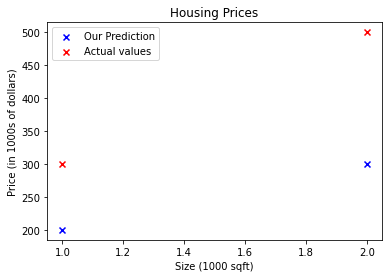

In [20]:
tmp_f_wb = compute_model_output(x_train, w, b)
# Plot our model prediction
plt.scatter(x_train, tmp_f_wb, marker='x', c='b', label='Our Prediction')
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual values' )
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()



As you can see, setting  𝑤=100  and  𝑏=100  does not result in a line that fits our data.

**Challenge**

Try experimenting with different values of  𝑤  and  𝑏 . What should the values be for a line that fits our data?

**Prediction**

Now that we have a model, we can use it to make our original prediction. Let's predict the price of a house with 1200 sqft. Since the units of  𝑥  are in 1000's of sqft,  𝑥  is 1.2.

In [21]:
w = 200                         
b = 100    
x_i = 1.2
cost_1200sqft = w * x_i + b    

print(f"${cost_1200sqft:.0f} thousand dollars")

$340 thousand dollars




**Linear regression** builds a model which establishes a relationship between features and targets

* In the example above, the feature was house size and the target was house price

* for simple linear regression, the model has two parameters  𝑤  and  𝑏  whose values are 'fit' using training data.

* once a model's parameters have been determined, the model can be used to make predictions on novel data.
​